In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'income', 'Spending Score (1-100)' : 'score'}, inplace='True')

In [5]:
df.head()

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [8]:
df = df.drop('CustomerID', axis = 1)

In [9]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0, 0.5, 'score')

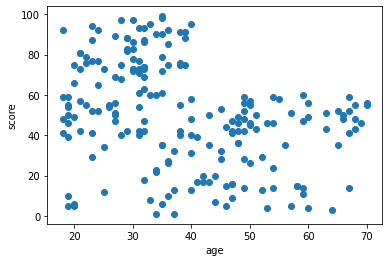

In [11]:
plt.scatter(df['age'], df['score'])
plt.xlabel('age')
plt.ylabel('score')

Text(0, 0.5, 'score')

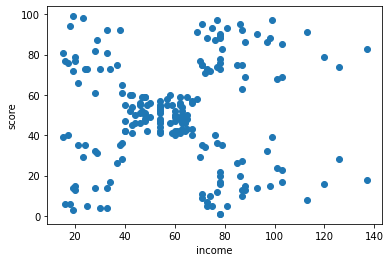

In [12]:
plt.scatter(df['income'], df['score'])
plt.xlabel('income')
plt.ylabel('score')

Text(0, 0.5, 'income')

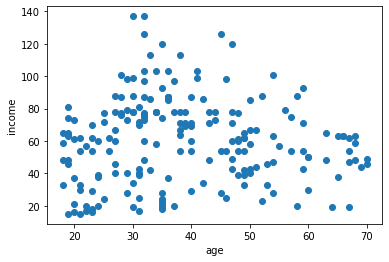

In [13]:
plt.scatter(df['age'], df['income'])
plt.xlabel('age')
plt.ylabel('income')

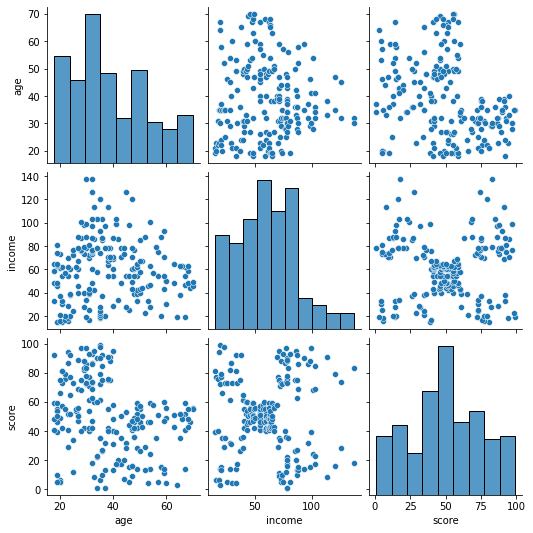

In [14]:
sns.pairplot(df[['age', 'income', 'score']])

In [15]:
import sklearn.cluster as cluster

In [17]:
kmeans = cluster.KMeans(n_clusters=5)

In [18]:
predicted = kmeans.fit_predict(df[['income', 'age']])

In [19]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 2, 4, 4, 4, 3, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
df['Cluster_Number'] = predicted
df['Cluster_Number']

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: Cluster_Number, Length: 200, dtype: int32

In [24]:
df.head()

,gender,age,income,score,Cluster_Number
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [25]:
centroids = kmeans.cluster_centers_
centroids

array([[109.7       ,  36.6       ],
       [ 27.24390244,  29.53658537],
       [ 78.03448276,  37.89655172],
       [ 48.92156863,  56.66666667],
       [ 59.33333333,  24.63333333]])

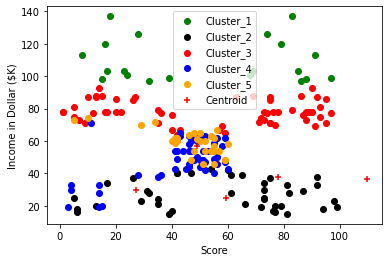

In [26]:
df1 = df[df.Cluster_Number==0]
df2 = df[df.Cluster_Number==1]
df3 = df[df.Cluster_Number==2]
df4 = df[df.Cluster_Number==3]
df5 = df[df.Cluster_Number==4]

plt.scatter(df1['score'], df1['income'],color='green',label='Cluster_1')
plt.scatter(df2['score'], df2['income'],color='black',label='Cluster_2')
plt.scatter(df3['score'], df3['income'],color='red',label='Cluster_3')
plt.scatter(df4['score'], df4['income'],color='blue',label='Cluster_4')
plt.scatter(df5['score'], df5['income'],color='orange',label='Cluster_5')

plt.scatter(centroids[:,0] , centroids[:,1], color='red', marker="+",label='Centroid')

plt.xlabel('Score')
plt.ylabel('Income in Dollar ($K)')
plt.legend()

In [27]:
from sklearn.cluster import KMeans

In [28]:
wcss = [] #empty list
clusters = range(1,15)
for k in clusters:
    km = KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_) #Inertia_ is the sum of squared error for each cluster.

In [29]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25095.703209997544,
 21850.16528258562,
 19779.01412122218,
 17577.687828862057,
 16245.622537103416,
 14320.918182339492,
 13195.65769449849]

Text(0.5, 1.0, 'Tennis Elbow Courve')

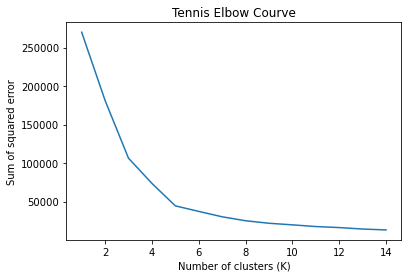

In [31]:
plt.xlabel('Number of clusters (K)') 
plt.ylabel('Sum of squared error') 
plt.plot(clusters,wcss) 
plt.title('Tennis Elbow Courve') 